<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [2]:
# Read Titanic Dataset
# titanic_csv = 'titanic_train.csv'
titanic = pd.read_csv('../../DATA/titanic_train.csv')

# Explore Dataset

## Head

In [25]:
# Check Head
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Tail

In [26]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [27]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [28]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [29]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
# Check titanic data again
titanic.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
titanic[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Fill Null Values

Is there any null values in any columns?

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every step

### Age

In [12]:
# ANSWER

# For missing ages, I would split the dataset by passenger class, then sort each Pclass by Fare,
# then use backfilling/forward filling to fill in the missing ages. I think this is fair because Age has the 
# strongest correlation with Pclass, and sorting by Fare will spread the missing values in a way that will
# allow backfilling to work well. It also makes sense that older people will have a higher Fare. 


In [3]:
def split_class_sort_fare(titanic):
    pclass1 = titanic[titanic['Pclass']==1].sort_values(by='Fare')
    pclass2 = titanic[titanic['Pclass']==2].sort_values(by='Fare')
    pclass3 = titanic[titanic['Pclass']==3].sort_values(by='Fare')

    return pclass1, pclass2, pclass3 

pclass1, pclass2, pclass3 = split_class_sort_fare(titanic)
    

In [4]:
def fill_ages(pclass1, pclass2, pclass3):
    pclass1['Age'] = pclass1['Age'].bfill()
    pclass2['Age'] = pclass2['Age'].bfill()
    pclass3['Age'] = pclass3['Age'].bfill()

    return pclass1, pclass2, pclass3

pclass1_filled, pclass2_filled, pclass3_filled = fill_ages(pclass1, pclass2, pclass3)

In [9]:
print(pclass1.isnull().sum())
print(pclass2.isnull().sum())
print(pclass3.isnull().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          40
Embarked        2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          168
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              8
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         0
dtype: int64


In [10]:
pclass3[pclass3['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [13]:
pclass3['Age'].ffill(inplace=True)

In [15]:
pclass3.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
180,181,0,3,"Sage, Miss. Constance Gladys",female,32.0,8,2,CA. 2343,69.55,F E69,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,32.0,8,2,CA. 2343,69.55,F E69,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,32.0,8,2,CA. 2343,69.55,F E69,S
201,202,0,3,"Sage, Mr. Frederick",male,32.0,8,2,CA. 2343,69.55,F E69,S
792,793,0,3,"Sage, Miss. Stella Anna",female,32.0,8,2,CA. 2343,69.55,F E69,S


In [16]:
titanic_age = pd.concat([pclass1, pclass2, pclass3])

### Cabin

In [18]:
# ANSWER

# I would remove the Cabin number column from the dataset because too many are missing, 
# their categories don't hold a lot of meaning, and we don't know the limits. 


In [19]:
titanic_age_nocabin = titanic_age.drop('Cabin', axis=1)

In [20]:
titanic_age_nocabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
633,634,0,1,"Parr, Mr. William Henry Marsh",male,38.0,0,0,112052,0.0,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S
815,816,0,1,"Fry, Mr. Richard",male,39.0,0,0,112058,0.0,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S


In [21]:
titanic_age_nocabin.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### Embarked

In [ ]:
# ANSWER

# I would use the cold deck method and find similar observations to copy the missing port of embarkation data from.
# I think this is acceptable in this column because there are only 2 missing values. As they the two passengers with the
# missing Cabins are on the same ticket we can assume they Embarked at the same port. 

In [22]:
titanic_age_nocabin[titanic_age_nocabin['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN


In [45]:
george_nelson = titanic_age_nocabin[titanic_age_nocabin['Fare']>80]
print(george_nelson)

     PassengerId  Survived  Pclass  \
445          446         1       1   
34            35         0       1   
375          376         1       1   
879          880         1       1   
835          836         1       1   
..           ...       ...     ...   
88            89         1       1   
341          342         1       1   
679          680         1       1   
258          259         1       1   
737          738         1       1   

                                              Name     Sex   Age  SibSp  \
445                      Dodge, Master. Washington    male   4.0      0   
34                         Meyer, Mr. Edgar Joseph    male  28.0      1   
375          Meyer, Mrs. Edgar Joseph (Leila Saks)  female  56.0      1   
879  Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
835                    Compton, Miss. Sara Rebecca  female  39.0      1   
..                                             ...     ...   ...    ...   
88                

In [46]:
george_nelson['Embarked'].value_counts()

Embarked
C    38
S    34
Q     2
Name: count, dtype: int64

In [ ]:
# It looks like it's most likely they embarked at C based on their Pclass and Fare. 

In [51]:
titanic_all_filled = titanic_age_nocabin.copy()
titanic_all_filled['Embarked'] = titanic_all_filled['Embarked'].fillna('C')


In [52]:
titanic_all_filled.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Describe

Describe your dataset.

In [54]:
# ANSWER

titanic_all_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,30.264972,14.155356,0.42,21.0000,29.0000,39.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [56]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)

    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show()

## Pclass

Use the `bar_charts` function above to view the relationship between survived and pclass.  Note your findings.

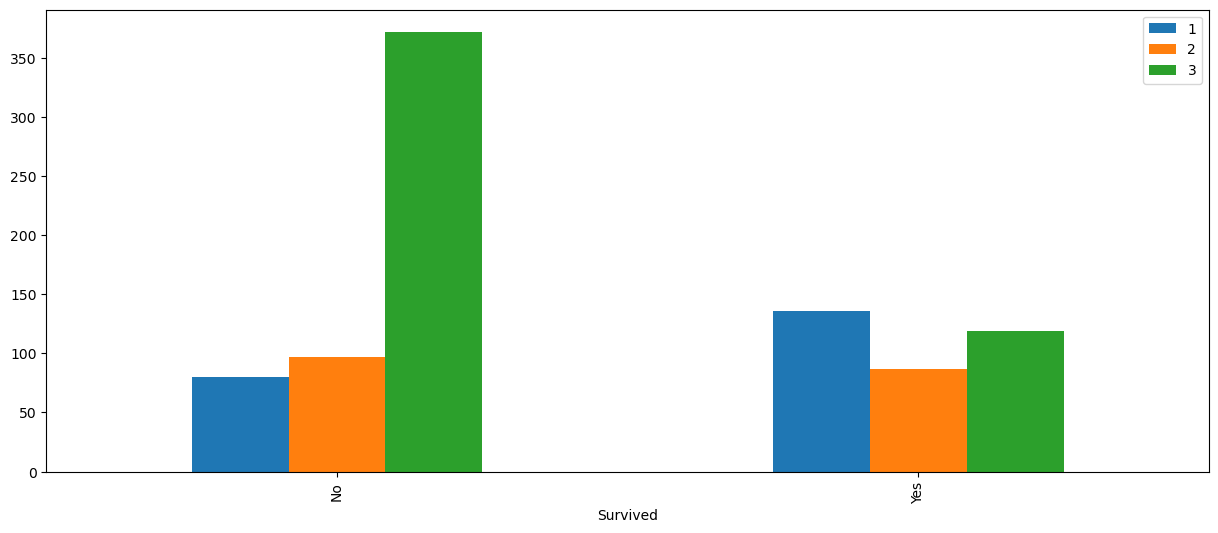

In [57]:
# ANSWER
bar_charts(titanic_all_filled, 'Pclass')

## Sex

Use `bar_charts` to view the relationship between survived and sex.  Note your findings.

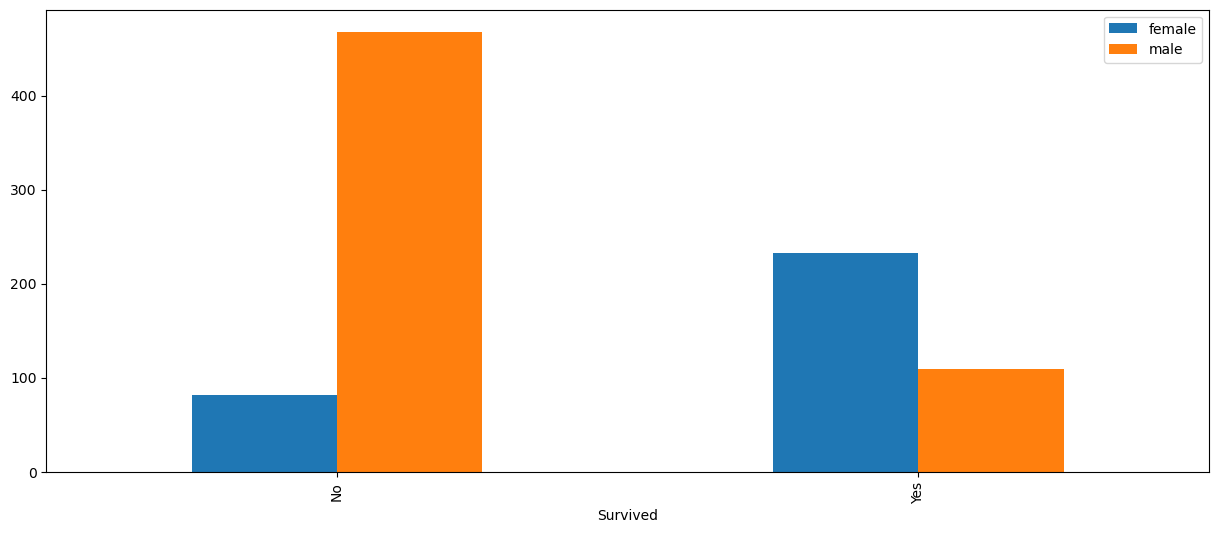

In [58]:
# ANSWER
bar_charts(titanic_all_filled, 'Sex')

## Parch

Parch = Number of parents and children travelling with each passenger. Use `bar_charts` to view the relationship between survived and Parch.

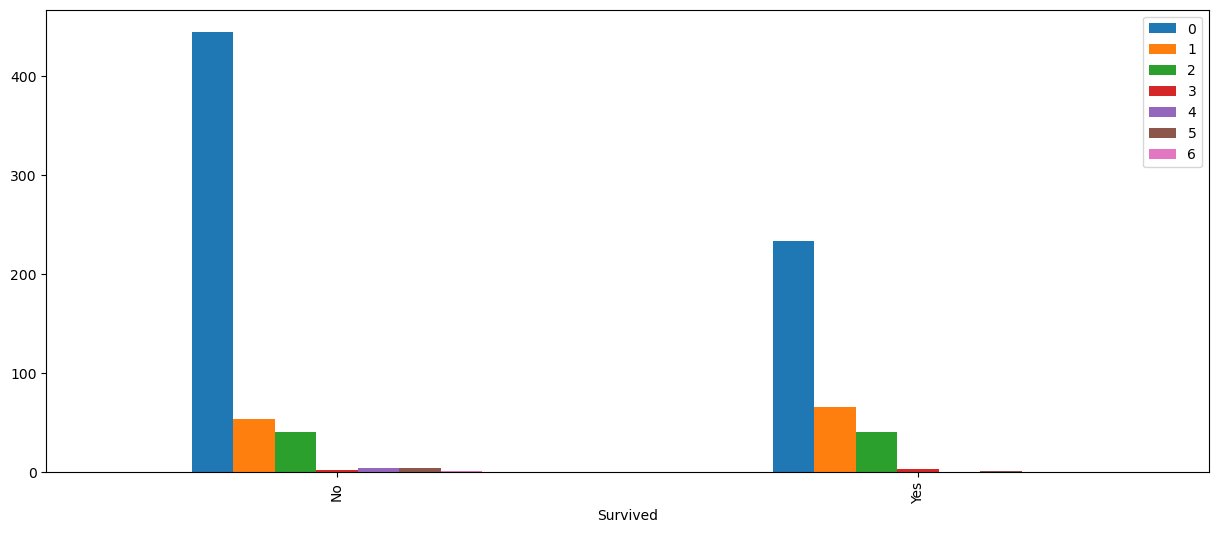

In [59]:
# ANSWER
bar_charts(titanic_all_filled, 'Parch')

## SibSp

SibSp = Number of siblings and spouses travelling with each passenger. Use `bar_charts` to view the relationship between survived and SibSp.

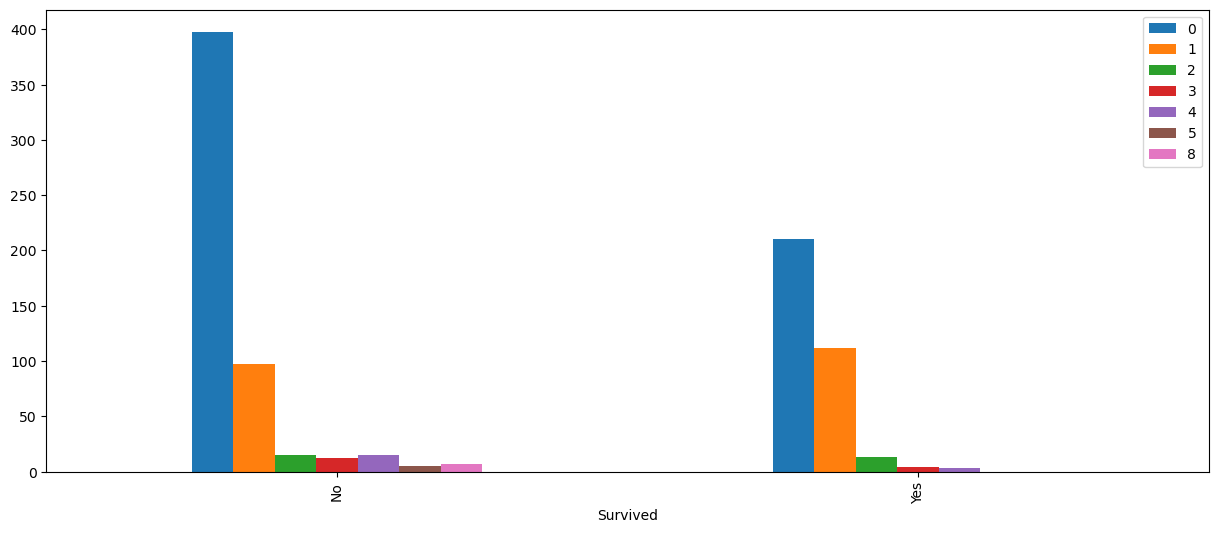

In [60]:
# ANSWER

bar_charts(titanic_all_filled, 'SibSp')

## Embarked

Do the same for the Embarked variable.

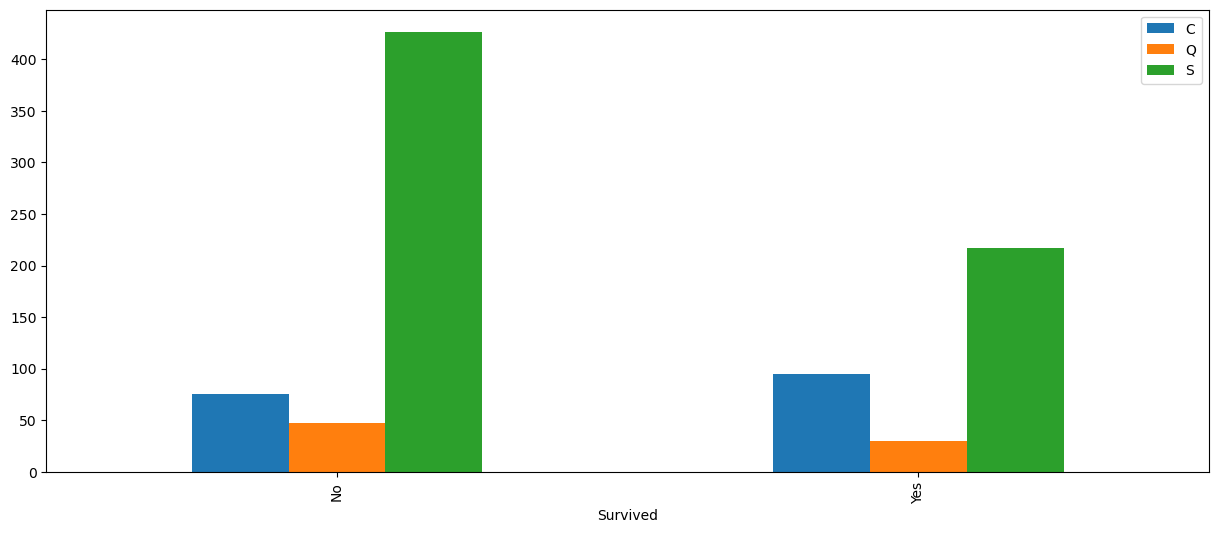

In [61]:
# ANSWER
bar_charts(titanic_all_filled, 'Embarked')

# Feature Engineering

We shall create some new features from the existing features.

## Fare Class

Create a new column 'Fare class' based on their fare as defined below. Is there any relationship between fare and survival?

In [83]:
def create_fare_class(x):
    fare_classes = []
    for i in x:
        if i > 30:
            fare_class = 1
        elif i > 20 and i <= 30:
            fare_class = 2
        elif i > 10 and i <= 20:
            fare_class = 3
        else:
            fare_class = 4
        fare_classes.append(fare_class)
    return fare_classes

In [84]:
# ANSWER
fare_class_feature = create_fare_class(titanic_all_filled['Fare'])
print(titanic_all_filled['Fare'])
print(fare_class_feature)

633     0.00
822     0.00
815     0.00
806     0.00
263     0.00
       ...  
180    69.55
863    69.55
846    69.55
201    69.55
792    69.55
Name: Fare, Length: 891, dtype: float64
[4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [85]:
titanic_fare_class = titanic_all_filled.copy()
titanic_fare_class['Fare Class'] = fare_class_feature
titanic_fare_class.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare Class
633,634,0,1,"Parr, Mr. William Henry Marsh",male,38.0,0,0,112052,0.0,S,4
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,4
815,816,0,1,"Fry, Mr. Richard",male,39.0,0,0,112058,0.0,S,4
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,S,4
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S,4


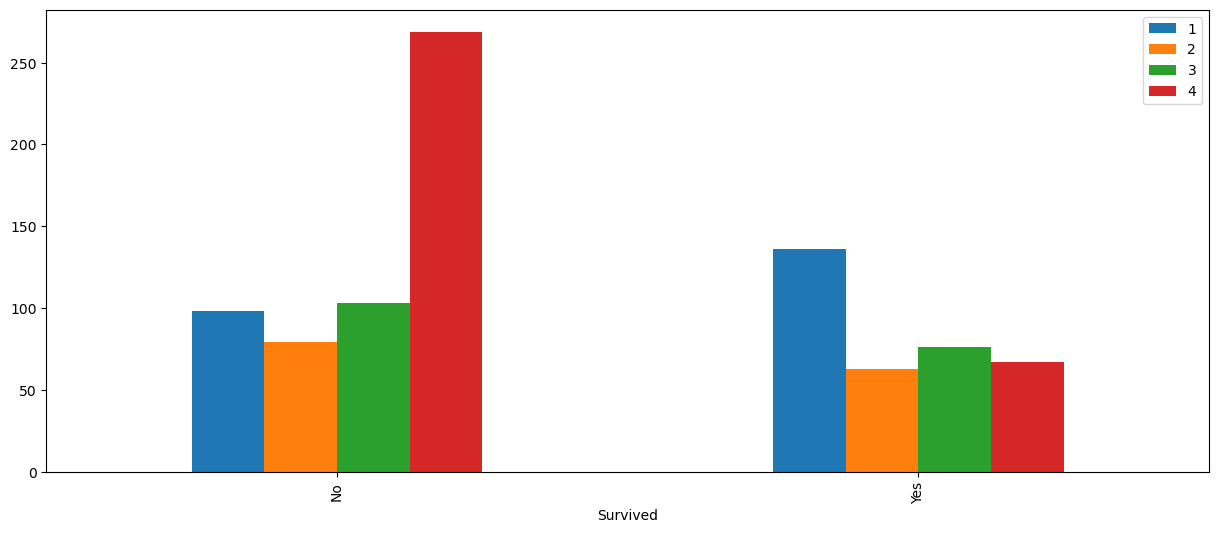

In [86]:
bar_charts(titanic_fare_class, 'Fare Class')

## Age Class

Similarly, create a new column 'Age class' based on their age as defined below.

In [88]:
def create_age_class(x):
    age_classes = []
    for i in x:
        if i > 60:
            age_class = 5
        elif i > 35 and i <= 60:
            age_class = 4
        elif i > 25 and i <= 35:
            age_class = 3
        elif i > 16 and i <= 25:
            age_class = 2
        else:
            age_class = 1
        age_classes.append(age_class)
    return age_classes

In [90]:
# ANSWER
age_class_feature = create_age_class(titanic_all_filled['Age'])

In [92]:
titanic_age_class = titanic_fare_class.copy()
titanic_age_class['Age Class'] = age_class_feature
titanic_age_class.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare Class,Age Class
180,181,0,3,"Sage, Miss. Constance Gladys",female,32.0,8,2,CA. 2343,69.55,S,1,3
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,32.0,8,2,CA. 2343,69.55,S,1,3
846,847,0,3,"Sage, Mr. Douglas Bullen",male,32.0,8,2,CA. 2343,69.55,S,1,3
201,202,0,3,"Sage, Mr. Frederick",male,32.0,8,2,CA. 2343,69.55,S,1,3
792,793,0,3,"Sage, Miss. Stella Anna",female,32.0,8,2,CA. 2343,69.55,S,1,3


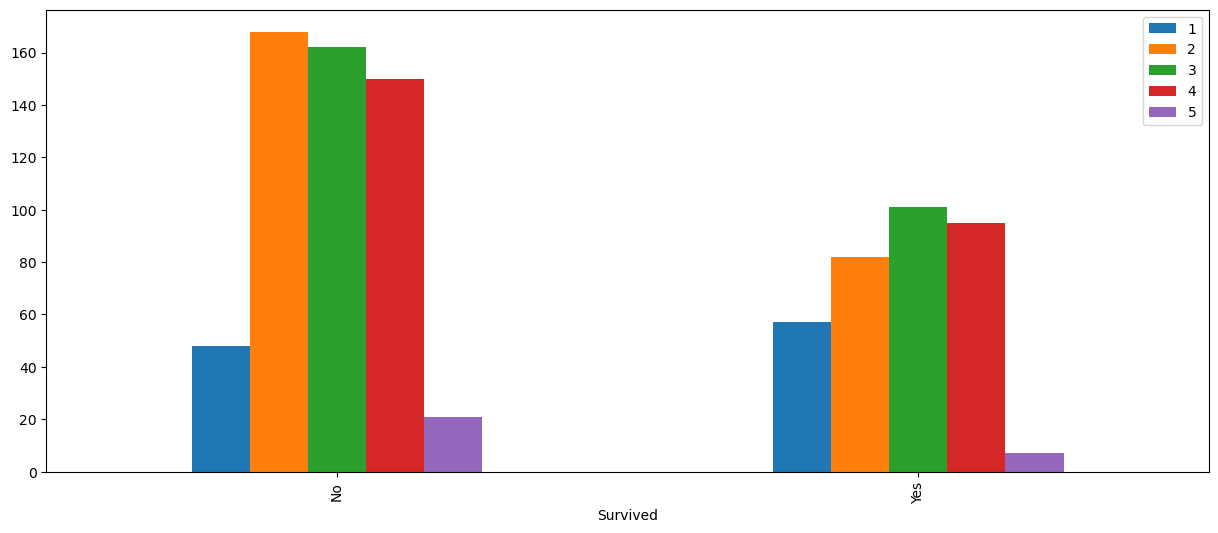

In [93]:
bar_charts(titanic_age_class, 'Age Class')

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [97]:
# ANSWER
titanic_age_class[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Fare Class', 'Age Class']].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare Class,Age Class
PassengerId,1.000000,-0.005007,-0.035144,0.035097,-0.057527,-0.001652,0.012658,0.003258,0.037536
Survived,-0.005007,1.000000,-0.338481,-0.062061,-0.035322,0.081629,0.257307,-0.307600,-0.056612
Pclass,-0.035144,-0.338481,1.000000,-0.338976,0.083081,0.018443,-0.549500,0.719670,-0.306932
Age,0.035097,-0.062061,-0.338976,1.000000,-0.208424,-0.173430,0.075764,-0.121287,0.937092
SibSp,-0.057527,-0.035322,0.083081,-0.208424,1.000000,0.414838,0.159651,-0.380692,-0.205694
Parch,-0.001652,0.081629,0.018443,-0.173430,0.414838,1.000000,0.216225,-0.387100,-0.150447
Fare,0.012658,0.257307,-0.549500,0.075764,0.159651,0.216225,1.000000,-0.599129,0.066784
Fare Class,0.003258,-0.307600,0.719670,-0.121287,-0.380692,-0.387100,-0.599129,1.000000,-0.105780
Age Class,0.037536,-0.056612,-0.306932,0.937092,-0.205694,-0.150447,0.066784,-0.105780,1.000000


# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group.

Collect two sets of data, one with passengers who survived and another one with passengers who died (call them `titanic_survived` and `titanic_died`). The sample sizes should ideally be the same but they can be different. Let's say that the sample sizes are 100.

In [ ]:
N=100
# ANSWER



In [ ]:
a = titanic_survived['Age']
b = titanic_died['Age']

### Set alpha (let alpha = 0.05)


In [ ]:
# ANSWER



### Calculate test statistic

> Here we identify a test statistic that can be used to assess the truth of the null hypothesis.

In [ ]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [ ]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Next we compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [ ]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t
if (t > 0):
    p = 2*(1 - stats.t.cdf(t, df = df))
else:
    p = 2*stats.t.cdf(t, df = df)

In [ ]:
print("t = " + str(t))
print("p = " + str(p))

### Interpret results

> The p-value is compared to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [ ]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    else:
        print("We fail to reject our null hypothesis.")

In [ ]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



